# Problem Set 2

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt
import seaborn as sns
import random as rand

os.chdir("/Users/arthurjohnson/Library/CloudStorage/OneDrive-UniversityofEdinburgh/Year 4/PNM for Economics/PNM-for-Econ-Group-1")

## Exercise 1a:
#### Are there duplicate households in the data? That is check if there are repeated observations in the unique household identifier variable. How many observations are there in the data?

In [20]:
File_Path = "/Users/arthurjohnson/Desktop/UNPS_1112_PS2.xls"
df = pd.read_excel(File_Path)

#Check for duplicate variables
duplicates = df.duplicated(['hhid'])

#Count the number of duplicates
print("Count of duplicate houoseholds:", duplicates.sum())

Count of duplicate houoseholds: 0


### Exercise 1b:
#### Present some basic summary statistics for the following variables: head_gender, head _age, familysize, consumption, income, wealth. Comment your results in 2 lines. In particular, you might mention if there are missing observations or potential outliers for some of the variables.

In [21]:
# Checking which columns have 2613 entries(i.e no missing values) entries
full_columns = df.columns[df.count() == 2613].tolist()
print("Columns with 2613 (all)  entries:\n\n -", ',\n - '.join(full_columns))

#Checking which columns have missing values
miss_columns = df.columns[df.count() < 2613].tolist()
print("\n\nColumns with missing values:\n\n -", '\n - '.join(miss_columns))


Columns with 2613 (all)  entries:

 - hhid,
 - wave,
 - year,
 - region,
 - urban,
 - year_surv,
 - month_surv,
 - consumption,
 - cfood,
 - cfood_gift,
 - income,
 - wealth


Columns with missing values:

 - district
 - county
 - head_gender
 - head_age
 - head_ethnic
 - head_writeread_yes
 - head_classeduc
 - familysize
 - cnodur
 - cdur
 - wage_labor
 - business_inc
 - other_inc
 - agriculture_inc
 - livestock_inc
 - asset_value
 - wealth_agrls
 - land_value_hat


       head_age  head_gender  familysize  consumption    income    wealth
count   2597.00      2597.00     2597.00      2613.00   2613.00   2613.00
mean      46.07         1.31        7.48      1803.79   1860.08   4912.70
std       15.07         0.46        3.71      1308.74   2607.52   8359.89
min       14.00         1.00        1.00       250.31     27.49      0.00
25%       34.00         1.00        5.00       918.32    471.20    720.02
50%       44.00         1.00        7.00      1426.61   1061.19   2108.60
75%       56.00         2.00        9.00      2296.86   2234.80   5221.94
max      100.00         2.00       33.00      8369.90  52137.74  76396.34


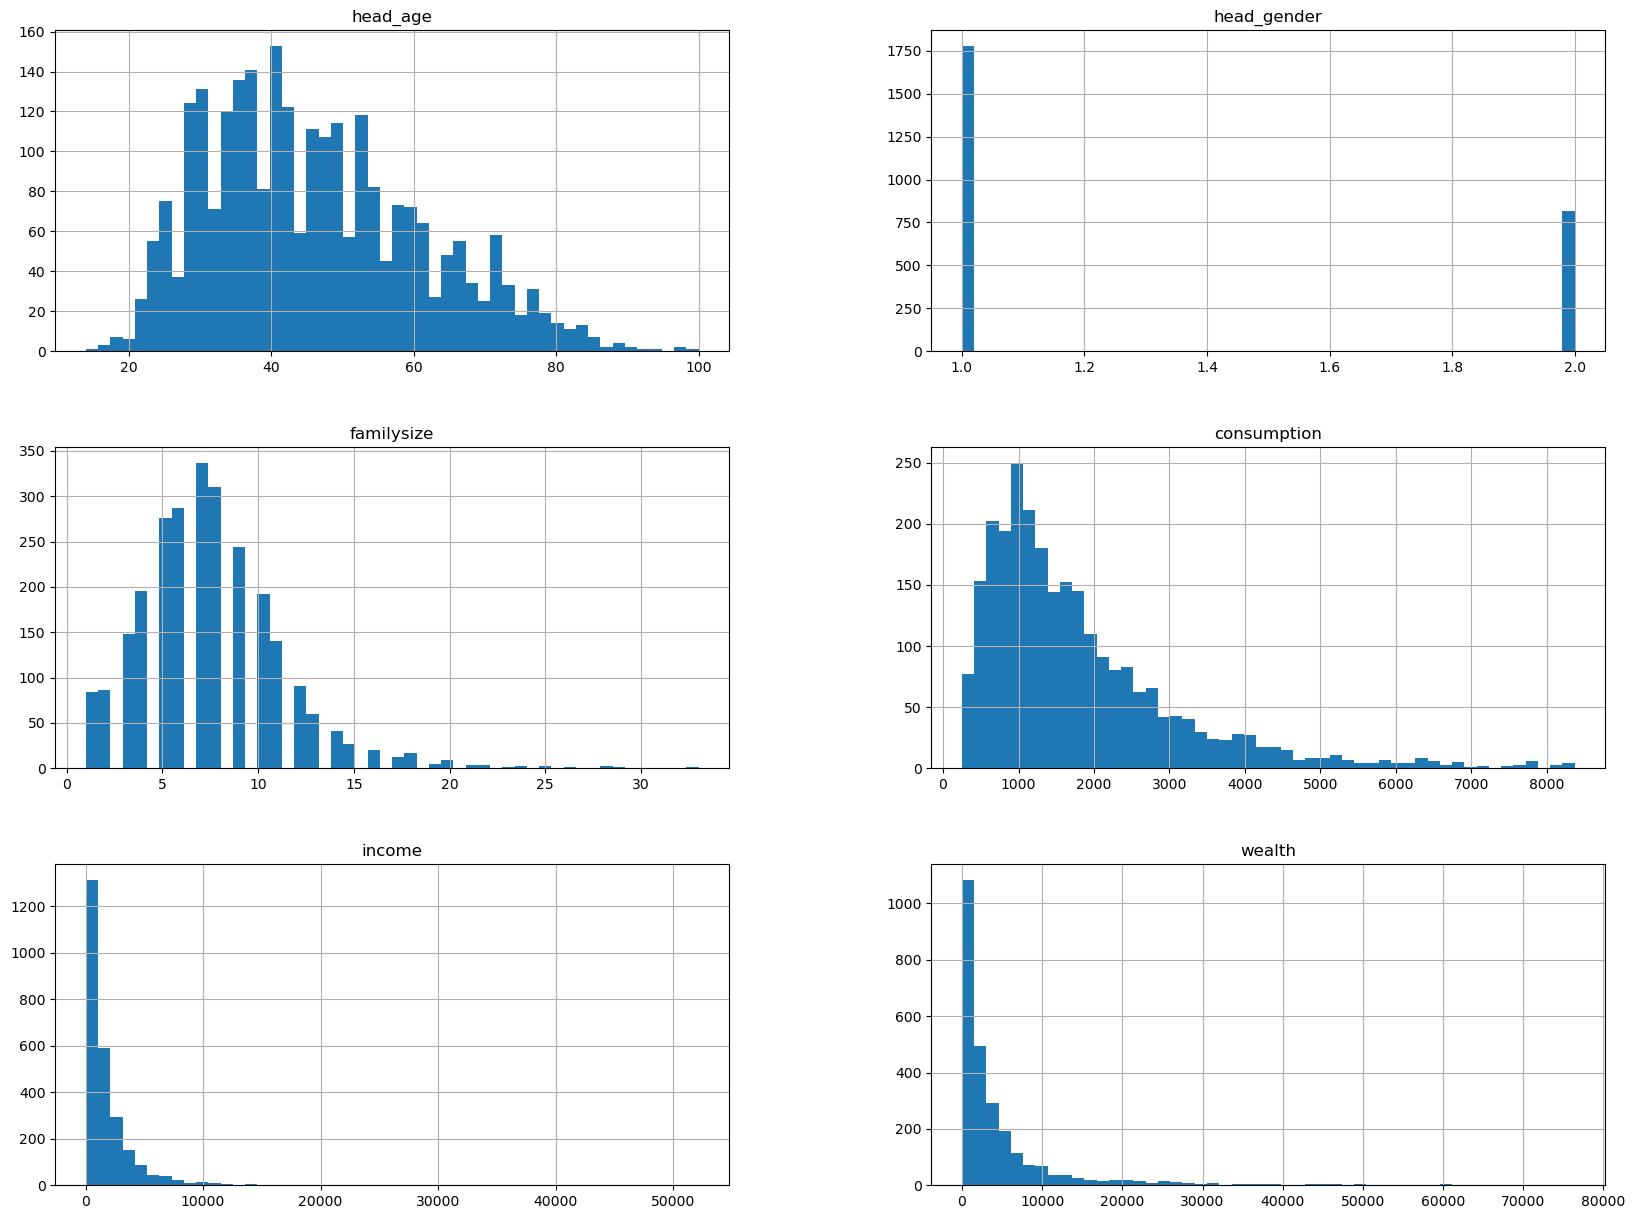

In [22]:
#Describing specific columns
columns_of_note = ['head_age', 'head_gender', 'familysize', 'consumption', 'income', 'wealth']
description = df[columns_of_note].describe().round(2)

# Displaying the results
print(description)

#Plotting histograms of each varaible to get an idea of shape of distributions
df[columns_of_note].hist(bins=50, figsize=(20,15))
plt.show()

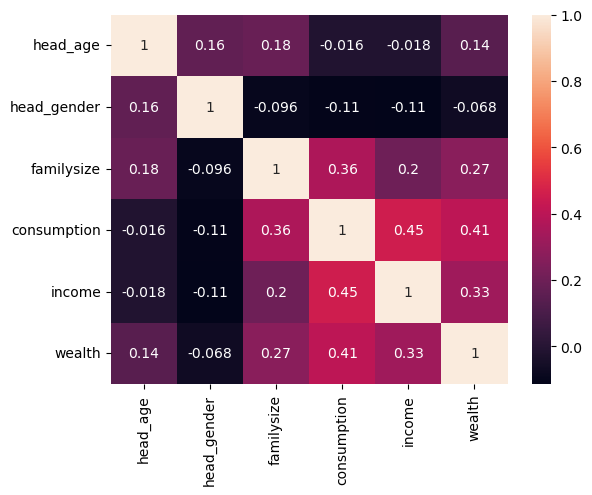

In [23]:
#Generate correlation matrix
df_matrix = df[columns_of_note].corr()
#Generate heat map to visualise this matrix and show the correlation between the variables of interest.
sns.heatmap(df_matrix, annot=True)
plt.show()

We observe that head_age, head_gender, and familysize are all missing exactly 16 values. The variables familysize, wealth, and income have some large outliers. Based on our correlation matrix, we observe that consumption, wealth, and income are all highly correlated.

### Exercise 1c: 
#### Using the head_gender variable, create a dummy variable for household head being female (1=female, 0=male). What is the proportion of households where the head is female?

In [24]:
# Creating a new dummy variable
df['female_dummy'] = df['head_gender'].apply(lambda x: "Female" if x == 2 else "Male")
    
# Counting the number of males and females
male_count = df['female_dummy'].value_counts().get(0, 0)
female_count = df['female_dummy'].value_counts().get(1, 0)

# Displaying the counts
print("Number of males:", male_count)
print("Number of females:", female_count)

# Calculating the proportion
total_count = len(df)
male_proportion = male_count / total_count
female_proportion = female_count / total_count

# Displaying the proportions
print("Proportion of males:", round(male_proportion, 3))
print("Proportion of females:", round(female_proportion, 3))

Number of males: 1797
Number of females: 816
Proportion of males: 0.688
Proportion of females: 0.312


### Exercise 1d: 
Using the groupby method, compute the average consumption, average household size, and average household head age for households where the head is male vs where the head is female. Do we observe noticeable differences across the two groups?


In [25]:
#Group our gender household variable by the value of the dummy
grouped_means = df.groupby('female_dummy')[['consumption', 'familysize', 'head_age']].mean()

print(grouped_means.round(2))

              consumption  familysize  head_age
female_dummy                                   
Female            1593.26        6.96     49.73
Male              1899.39        7.72     44.39


We notice a difference in level of consumption, with households where the head is male having greater overall levels of consumption. The difference as a proportion is as follows:
$$\frac{male \ consumption}{female\ consumption} = \frac{1899.392959}{1593.261206} \approx 1.1921$$

We postulate that this could be due to the reduced earning potential of women in Ugandan society, leading to households led by women having a lower overall household income and therefore lower consumption. Due to gender norms within Uganda, many female led households will be a single parent household in which there is no male parent present, and we would therefore expect this to cause lower consumption among female led households.

We can also see that the average family size for men is slightly larger, with the proportion being as follows:

$$\frac{male \ family \ size}{female \ family \ size} = \frac{7.720943}{6.955882} \approx 1.109 $$

We hypothesise that this can be potentially explained by the increased earning potential of males within Ugandan society, and therefore male led households have the ability to support larger households. 

The average age of household heads is higher for female led households, with the difference as a proportion being as follows: $$\frac{male \ head \ age}{female \ head \ age} = \frac{44.388546}{49.734069} \approx 0.893$$

The absolute difference is years.

$$|male \ head \ age - female \ head \ age| = |44.388546 - 49.734069| \approx 5.346$$

We postulate that this is due to the fact that many female lead households will be female led because the previous male househould head is deceased.

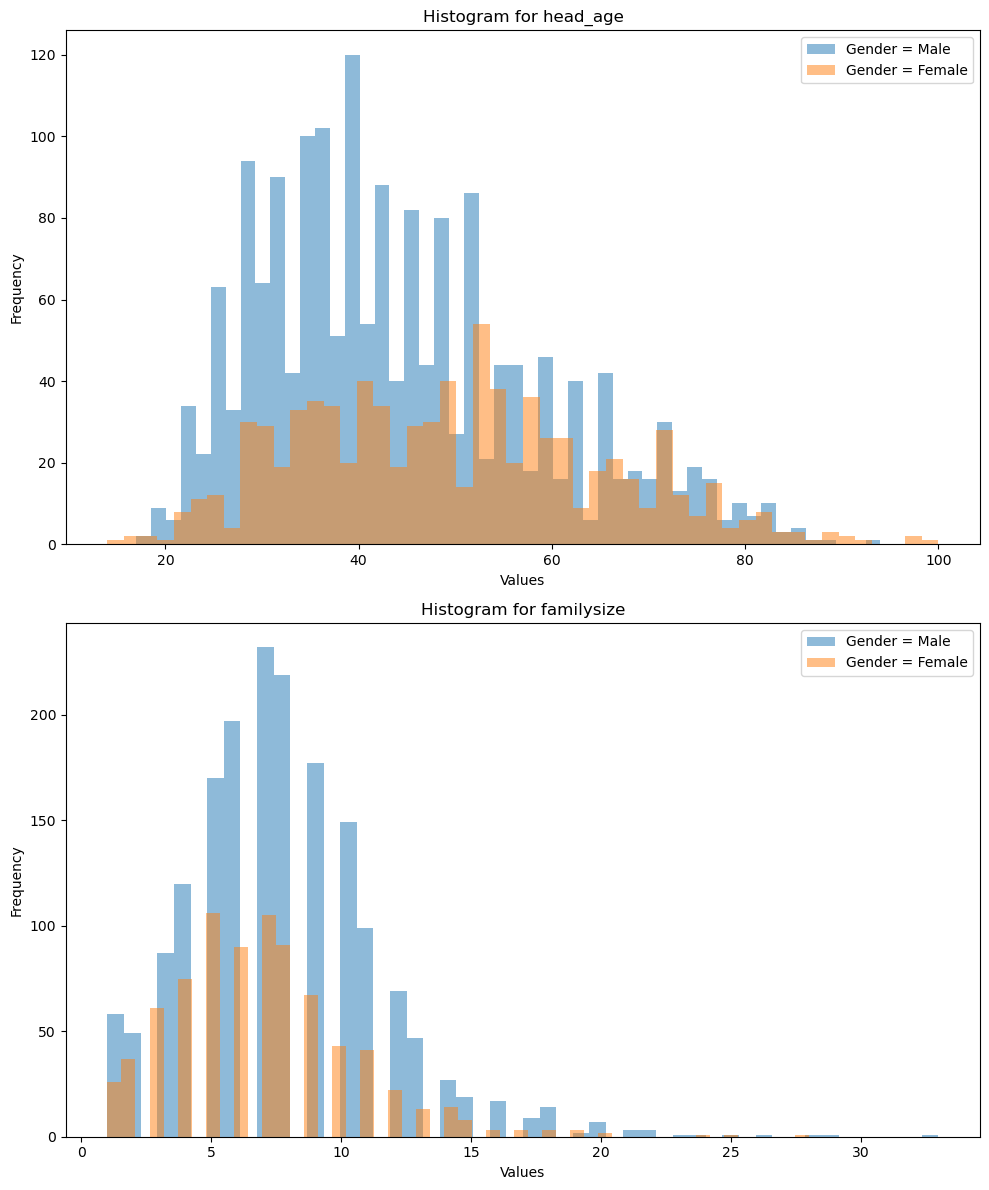

In [26]:
'''We have looked at the difference in values, but we can also
visualise the difference in distributions of values for male vs female led households'''

columns_of_note_2 = ['head_age', 'familysize', 'female_dummy']

# Create subplots for each variable
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Plot histograms for each variable with male and female distributions on the same line
for idx, column in enumerate(columns_of_note_2[:-1]):  # Exclude 'female_dummy' from the loop
    for gender_value in df['female_dummy'].unique():
        axes[idx].hist(df[df['female_dummy'] == gender_value][column], bins=50, alpha=0.5, label=f'Gender = {gender_value}')
    
    axes[idx].set_title(f'Histogram for {column}')
    axes[idx].set_xlabel('Values')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend(loc='upper right')

plt.tight_layout()
plt.show()

## Exercise 2
### Exercise 2a:
#### Create the variables log_c, log_inc, log_w that are the log of consumption, income, and wealth, respectively. Plot in the same graph the distribution of the log of consumption and the log of income. Do the distributions resemble some known distribution? Is inequality higher in consumption or in income?

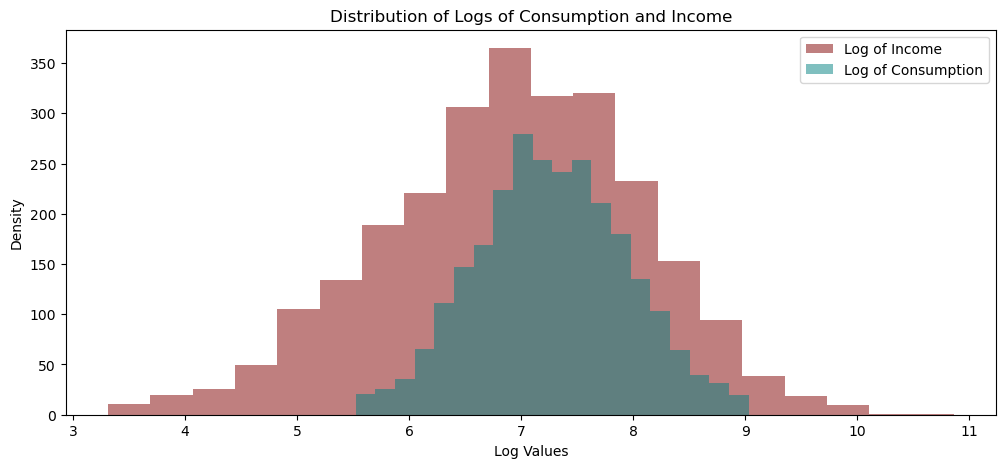

In [27]:
df['log_c'] = np.log(df.consumption)
df['log_inc'] = np.log(df.income)
# Wealth has values of 0, so we have to account for them. If we make this too small, it gives us an odd distribution and a very large variance in the logs required for part b:
df['log_w'] = np.log(df.wealth + 1)

plt.figure(figsize=(12, 5))

plt.hist(df['log_inc'], bins=20, alpha=0.5, color ='maroon', label='Log of Income')
plt.hist(df['log_c'], bins=20, alpha=0.5, color = 'teal', label='Log of Consumption')

plt.xlabel('Log Values')
plt.ylabel('Density')
plt.title('Distribution of Logs of Consumption and Income')

plt.legend()
plt.show()

They resemble something close to a Gaussian, or normal, distribution.

Inequality is greater in terms of income.

### Exercise 2b:
#### A commonly used statistic to measure inequality is the variance of the logs. Compute the variance of the log of consumption, of the log of income, and of the log of wealth. How do these measures of inequality in Uganda compare to the same measures of inequality in the United States? Use table 3, column 5–PSID in De Magalhães, L., & Santaeulàlia-Llopis, R. (2018) for the comparison.

In [28]:
var_income = df.log_inc.var()
var_consumption = df.log_c.var()
var_wealth = df.log_w.var()

# Print the variances for Uganda and the United States
print("Variance of logs of income:", round(var_income, 2), "(0.97)")

print("Variance of the logs of consumption:", round(var_consumption, 2), "(0.79)")

print("Variance of the logs of wealth:", round(var_wealth, 2), "(2.11)")

Variance of logs of income: 1.34 (0.97)
Variance of the logs of consumption: 0.45 (0.79)
Variance of the logs of wealth: 2.98 (2.11)


The variance of the logs of income, consumption, and wealth in the De Magalhães, L., & Santaeulàlia-Llopis, R. (2018) are given in brackets

From this, we know that the UNPS data for uganda has a greater variance in terms of both income and wealth, but a lower variance in the log of the consumption.

### Exercise 2c:
#### Measuring between rural and urban inequality in Uganda. Compute the average consump- tion, income, and wealth for rural and urban areas separately (groupby). Are the differences between the two areas large?

In [29]:
average_inc = df.groupby('urban')['income'].mean()
average_c = df.groupby('urban')['consumption'].mean()
average_w = df.groupby('urban')['wealth'].mean()

# Print the average values and the differences
print("Average income:")
print("Rural:",round(average_inc.loc[0], 2),"USh")
print("Urban:",round(average_inc.loc[1], 2),"USh")

print("\nAverage consumption:")
print("Rural:",round(average_c.loc[0], 2),"USh")
print("Urban:",round(average_c.loc[1], 2),"USh")

print("\nAverage wealth:")
print("Rural:",round(average_w.loc[0], 2),"USh")
print("Urban:",round(average_w.loc[1], 2),"USh")

Average income:
Rural: 1713.96 USh
Urban: 2480.62 USh

Average consumption:
Rural: 1629.45 USh
Urban: 2544.22 USh

Average wealth:
Rural: 4521.0 USh
Urban: 6576.26 USh


### Exercise 2d:
#### Measuring within rural and urban inequality in Uganda. Compute the variance of the log of consumption, income, and wealth for rural and urban areas separately.

In [30]:
var_log_inc = df.groupby('urban')['log_inc'].var()
var_log_c = df.groupby('urban')['log_c'].var()
var_log_w = df.groupby('urban')['log_w'].var()

# Print the average values and the differences
print("Average income differences between urban and rural areas (log):")
print("Rural:",round(var_log_inc.loc[0], 2))
print("Urban:",round(var_log_inc.loc[1], 2))

print("\nAverage consumption differences between urban and rural areas (log):")
print("Rural:",round(var_log_c.loc[0], 2))
print("Urban:",round(var_log_c.loc[1], 2))

print("\nAverage wealth differences between urban and rural areas (log):")
print("Rural:",round(var_log_w.loc[0], 2))
print("Urban:",round(var_log_w.loc[1], 2))

Average income differences between urban and rural areas (log):
Rural: 1.34
Urban: 1.11

Average consumption differences between urban and rural areas (log):
Rural: 0.41
Urban: 0.44

Average wealth differences between urban and rural areas (log):
Rural: 2.52
Urban: 4.88


### Exercise 2e:
#### Compute the Gini coefficient in consumption, in income, and in wealth in Uganda. Com- pare these values with the Gini coefficients in the United States—table 3, column 5–PSID in De Magalhães, L., & Santaeulàlia-Llopis, R. (2018)

In [31]:
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total = total + np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

# Print the gini values
print("Gini coefficient for income in Uganda (US):", round(gini(df.income), 2), "(0.44)")

print("\nGini coefficient for consumption in Uganda (US):", round(gini(df.consumption), 2), "(0.41)")

print("\nGini coefficient for wealth in Uganda (US):", round(gini(df.wealth), 2), "(0.79)")

Gini coefficient for income in Uganda (US): 0.56 (0.44)

Gini coefficient for consumption in Uganda (US): 0.37 (0.41)

Gini coefficient for wealth in Uganda (US): 0.66 (0.79)


### Exercise 2f:
#### Compute the share of the wealth that the bottom 50 percent hold. Compute the share of the wealth that the top 10, 5, and 1 percent hold.

In [32]:
# Calculate the total wealth for the demoniator used later
total_wealth = np.sum(df.wealth)

percentile_50 = np.percentile(df.wealth, 50)
percentile_90 = np.percentile(df.wealth, 90)
percentile_95 = np.percentile(df.wealth, 95)
percentile_99 = np.percentile(df.wealth, 99)

# Calculate the total wealth held by different percentiles
bottom_50_percent = np.sum(df[df.wealth <= percentile_50]['wealth'])
top_10_percent = np.sum(df[df.wealth >= percentile_90]['wealth'])
top_5_percent = np.sum(df[df.wealth >= percentile_95]['wealth'])
top_1_percent = np.sum(df[df.wealth >= percentile_99]['wealth'])

# Calculate percentages
bottom_50_percent_share = bottom_50_percent / total_wealth
top_10_percent_share = top_10_percent / total_wealth
top_5_percent_share = top_5_percent / total_wealth
top_1_percent_share = top_1_percent / total_wealth

# Print results
print("Share of the wealth that the bottom 50 percent hold:", round(bottom_50_percent_share*100, 2), "%")
print("Share of the wealth that the top 10 percent hold:", round(top_10_percent_share*100, 2), "%")
print("Share of the wealth that the top 5 percent hold:", round(top_5_percent_share*100, 2), "%")
print("Share of the wealth that the top 1 percent hold:", round(top_1_percent_share*100, 2),"%")


Share of the wealth that the bottom 50 percent hold: 8.23 %
Share of the wealth that the top 10 percent hold: 51.11 %
Share of the wealth that the top 5 percent hold: 35.25 %
Share of the wealth that the top 1 percent hold: 11.91 %


### Exercise 2g:
#### Although in the last years, there has been a big debate on inequality, the debate has mostly focused on rich countries. From your results of this exercise, discuss whether inequality is relatively large in Uganda with respect to rich countries.

TL;DR: The wealth inequality in Uganda is relatively small with respect with rish countries, when looking within-country, and not internationally.

From this study, we see that wealth inequality is comparitavily lower in Uganda than it is in the US and other richer nations. It should be noted though that the top 1% in Uganda will not have the same wealth levels of the top 1% in richer nations. It is only on a national level that we see Uganda has lower wealth disparities between its residents. 

### Exercise 2h:
#### The few previous studies on income inequality in Africa had to rely on consumption measures to estimate income inequality. See, for example, Alvaredo & Gasparini (2005). Debate on the advantages and disadvantages of using consumption measures to study income inequality.

#### Advantages:
- Under the law of large numbers, the differences between consumption patters in different countries are likely to me mitigated. Especially in socially- and economically-similar countries.
- Consumption could be adjusted to account foor purchasing power differences between nations.
- Consumption is likely easier to measure.
- Strong correlation between consumption and income.

#### Disadvantages:
- Not necessarily reflective of actuall incomes; different consumption profiles, including addiction levels, between nations could impact results.
- Differing purchasing power between nations.
- Consumption patterns will vary more in relation to national interest rates, where incomes are likely to be less impacted by interest rates, especially in the short term.
- Consumption is likely to be lagged and more dependent on previous values of itself and income.
- Different nations have different consumption requirements. Is there a distinction between necessities and indulgences?

## Exercise 3
### Exercise 3a:
#### Plot the lifecycle of the log of consumption for households where the head is male and for households where the head is female.

In [33]:
# 'n/a's will automatically be eraticated when setting the following restrictions
df_lifecycle = df[(df['head_age'] >= 18) & (df['head_age'] <= 80)].copy()

# Create bins to smoothen the lines out between individual years
age_bins = [18, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
age_labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79']
df_lifecycle['age_group'] = pd.cut(df_lifecycle['head_age'], bins=age_bins, labels=age_labels)

# Plot lifecycle by gender using define function so we can easily change from Income, Consumption, and Wealth
def lifecycle(df, inc_c_w, type):
    plt.figure(figsize = (15, 6))
    sns.lineplot(data = df, 
                 x = 'age_group', 
                 hue = df_lifecycle['head_gender'].map({1: 'Male', 2: 'Female'}), 
                 y = inc_c_w, 
                 palette = {'Female': 'maroon', 'Male': 'teal'})
    plt.xlabel('Age (years)')
    plt.ylabel('Log of ' + type)
    plt.title("Log " + type + " over time, by gender")
    plt.legend(title = "Gender of Head")
    plt.show()

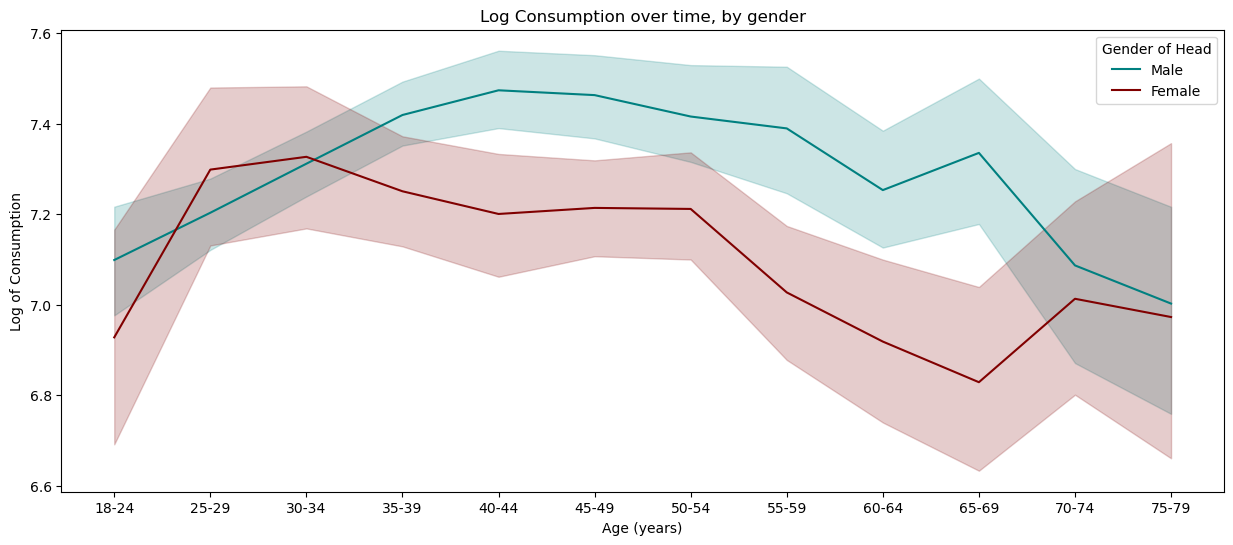

In [34]:
lifecycle(df_lifecycle, 'log_c', 'Consumption')

### Exercise 3b(i):
#### Redo the same plot but for the log of income

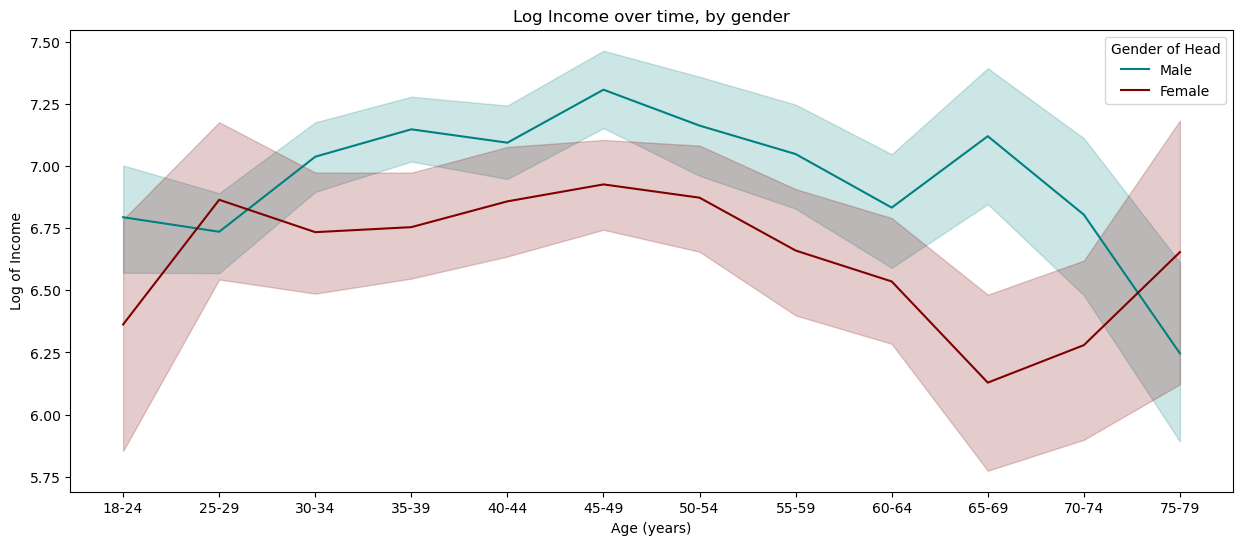

In [35]:
lifecycle(df_lifecycle, 'log_inc', 'Income')

### Exercise 3b(ii):
#### Redo the same plot but for the log of wealth

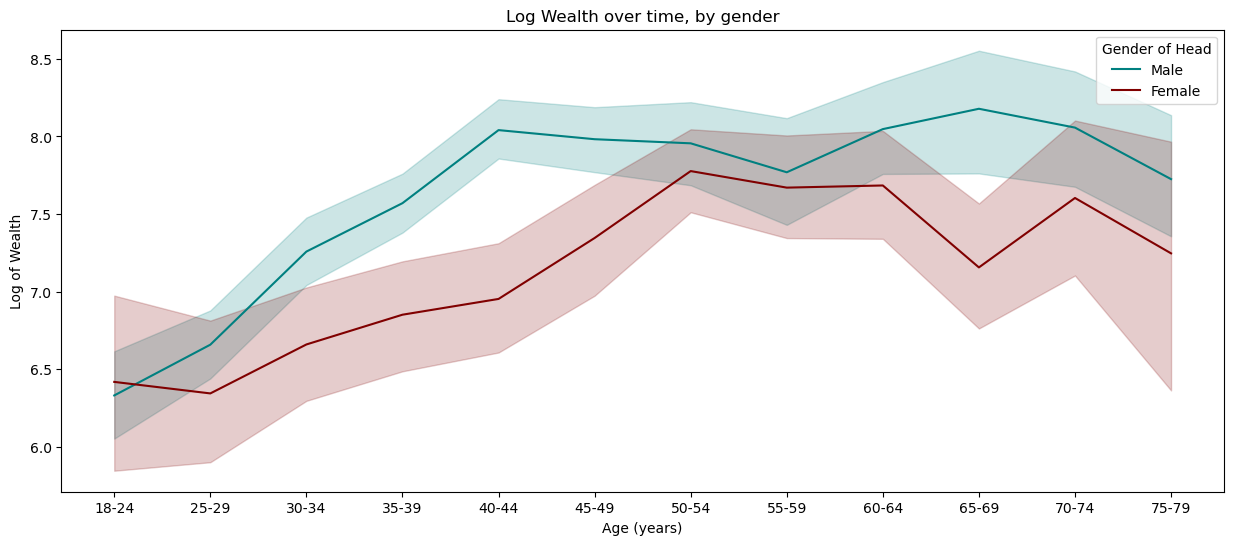

In [36]:
lifecycle(df_lifecycle, 'log_w', 'Wealth')

### Exercise 3c:
#### What are the differences in the lifecycle of consumption, income, and wealth of households across the gender of the household heads? Comment your results.

Income typically increases until c.50 years old, before it begins to decline again.

Consumption typically follows the same path as income, which is logical.

Wealth is typically increasing over the lifecycle of particpants, with it petering off a little after retirement age (c.>65 years of age)